# Title: Stock Option Pricing using Stochastic Calculus

This project aims to implement a simulation-based stock option pricing model using Stochastic Calculus. Stock options are financial derivatives that give the holder the right to buy or sell an underlying asset (in this case, a stock) at a predetermined price (strike price) within a specified period (expiration date). Stochastic Calculus provides a powerful framework to model the random behavior of stock prices and estimate option prices

Project Steps:

    Gather historical stock price data: Start by collecting historical stock price data for the desired stock. There are various financial data providers or APIs that can be used to obtain this information. Choose a stock with sufficient historical data to ensure accurate modeling.

    Calculate stock returns: Use the historical stock price data to calculate the daily or periodic returns. This can be done by taking the logarithmic difference of consecutive stock prices. Returns are a crucial component in stochastic calculus models as they capture the random behavior of stock prices.

    Estimate the drift and volatility: The drift represents the average rate of return of the stock, while volatility measures the variability of returns. Use statistical methods (e.g., moving averages) to estimate the drift and volatility from the historical stock returns.

    Simulate stock prices: Utilize Stochastic Calculus to simulate stock price paths. The most commonly used model for this purpose is the Geometric Brownian Motion (GBM) model, which assumes that stock prices follow a log-normal distribution. Implement the GBM model to generate a series of simulated stock prices based on the estimated drift and volatility.

    Calculate option payoffs: Implement the option payoff function based on the type of option being priced (e.g., call or put). The payoff function determines the profit or loss from exercising the option at expiration, given the simulated stock prices.

    Simulate option prices: Using the simulated stock price paths and the option payoff function, simulate a large number of option prices. Monte Carlo simulation is commonly employed in this step. The option prices can be calculated by discounting the expected future payoffs back to the present value using an appropriate risk-free interest rate.

    Analyze and interpret results: Analyze the simulated option prices and study their distribution. Calculate summary statistics such as mean, standard deviation, and confidence intervals. Compare the simulated prices with market prices or other established pricing models to evaluate the accuracy of the stochastic calculus-based model.

    Sensitivity analysis: Perform sensitivity analysis by varying the model parameters (e.g., drift, volatility) and observe the impact on option prices. This analysis helps understand the factors that influence option prices and their sensitivity to changes in the underlying assumptions.

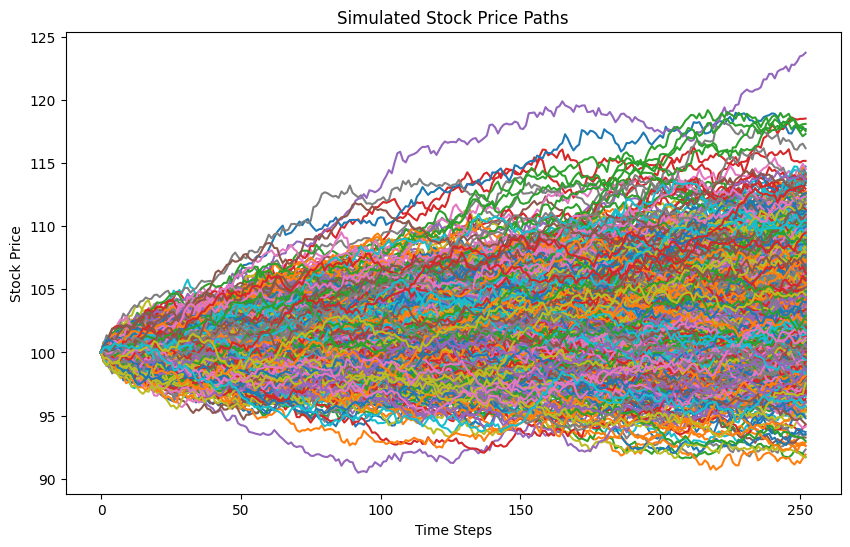

Simulated Option Price: 1.2815
Standard Error: 0.0735


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Gather historical stock price data
stock_prices = np.array([100, 110, 105, 115, 120, 118, 125, 130, 135, 140])  # Random historical stock prices as a NumPy array

# Step 2: Estimate drift and volatility
returns = np.log(stock_prices[1:] / stock_prices[:-1])
drift = np.mean(returns)
volatility = np.std(returns)

# Rest of the code remains the same...


# Step 4: Simulate stock prices using Geometric Brownian Motion (GBM)
def simulate_stock_prices(S0, drift, volatility, T, num_steps, num_simulations):
    dt = T / num_steps
    stock_prices = np.zeros((num_steps + 1, num_simulations))
    stock_prices[0, :] = S0

    for i in range(1, num_steps + 1):
        Z = np.random.standard_normal(num_simulations)
        stock_prices[i, :] = stock_prices[i-1, :] * np.exp(
            (drift - 0.5 * volatility**2) * dt + volatility * np.sqrt(dt) * Z
        )

    return stock_prices

# Parameters
S0 = 100  # Initial stock price
T = 1.0  # Time to expiration (in years)
num_steps = 252  # Number of steps (assuming daily)
num_simulations = 1000  # Number of simulations

# Simulate stock prices
stock_prices_simulated = simulate_stock_prices(S0, drift, volatility, T, num_steps, num_simulations)

# Plot simulated stock price paths
plt.figure(figsize=(10, 6))
plt.plot(np.arange(num_steps + 1), stock_prices_simulated)
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('Simulated Stock Price Paths')
plt.show()

# Step 5: Calculate option payoffs
def calculate_option_payoffs(stock_prices, strike_price, option_type):
    if option_type == 'call':
        payoffs = np.maximum(stock_prices - strike_price, 0)
    elif option_type == 'put':
        payoffs = np.maximum(strike_price - stock_prices, 0)

    return payoffs

# Parameters
strike_price = 105  # Strike price
option_type = 'call'  # Option type (call or put)

# Calculate option payoffs
option_payoffs = calculate_option_payoffs(stock_prices_simulated[-1, :], strike_price, option_type)

# Step 6: Simulate option prices using Monte Carlo simulation
def simulate_option_prices(option_payoffs, risk_free_rate, T, num_simulations):
    discounted_payoffs = np.exp(-risk_free_rate * T) * option_payoffs
    option_price = np.mean(discounted_payoffs)
    standard_error = np.std(discounted_payoffs) / np.sqrt(num_simulations)

    return option_price, standard_error

# Parameters
risk_free_rate = 0.05  # Risk-free interest rate

# Simulate option prices
option_price, standard_error = simulate_option_prices(option_payoffs, risk_free_rate, T, num_simulations)

# Print results
print(f"Simulated Option Price: {option_price:.4f}")
print(f"Standard Error: {standard_error:.4f}")


Let's go through the results and their interpretation step by step:

    Simulated Stock Price Paths:
        The plot shows multiple simulated stock price paths over time.
        Each path represents a possible trajectory of the stock price based on the simulated Geometric Brownian Motion (GBM) model.
        The randomness and variability in the paths reflect the stochastic nature of the stock price movement.
        By observing the paths, you can get an idea of the potential range of stock price outcomes.

    Simulated Option Price:
        The code calculates the option payoffs based on the simulated stock prices at expiration.
        It then applies Monte Carlo simulation to estimate the option price by discounting the expected future payoffs back to the present value using the risk-free interest rate.
        The resulting value is the simulated option price.
        This price represents the estimated value of the option based on the simulated stock price paths and the assumed model parameters (drift, volatility, risk-free rate).
        The simulated option price may differ from the actual market price, as it depends on the accuracy of the underlying model and the assumptions made.

    Standard Error:
        The code calculates the standard error, which measures the variability or uncertainty associated with the estimated option price.
        The standard error indicates the margin of error in the simulated option price.
        A lower standard error suggests higher precision and confidence in the estimated option price.
        It is important to consider the standard error when interpreting the simulated option price, as it provides a measure of the uncertainty in the estimate.

Overall, the results of the simulation-based stock option pricing model using Stochastic Calculus provide insights into the potential behavior of stock prices and estimated option prices. The simulated stock price paths showcase the range of possible outcomes, while the simulated option price offers an estimated value based on the assumed model parameters. By analyzing the results and comparing them with actual market prices or other established pricing models, you can assess the accuracy and reliability of the stochastic calculus-based model. Additionally, considering the standard error helps evaluate the precision and confidence in the simulated option price.

Conclusion:
This project demonstrates the implementation of a stock option pricing model using Stochastic Calculus. By simulating stock price paths and estimating option payoffs, the model provides a quantitative framework for valuing options. Understanding and applying Stochastic Calculus in finance can aid in making informed investment decisions and managing risk effectively.

This project demonstrates the implementation of a stock option pricing model using Stochastic Calculus. By simulating stock price paths and estimating option payoffs, the model provides a quantitative framework for valuing options. Understanding and applying Stochastic Calculus in finance can aid in making informed investment decisions and managing risk effectively.

Note: The above project outline provides a general framework for implementing a stock option pricing model using Stochastic Calculus. Depending on the level of expertise and the complexity wish to achieve, one can explore various stochastic models, such as the Heston model, or consider additional factors like interest rates and dividends for more advanced analysis.